In [5]:
# 앞에 k-최근접 이웃 알고리즘이 아닌 다른 알고리즘(선형회귀)을 사용해보기

# 앞에 k-최근접 이웃 알고리즘의 한계는 다음과 같다.
# 1. 만약에 5~45의 길이를 가진 농어라면 괜찮은 답을 내어주지만...
# 2, 만약에 45길이를 벗어난 아주 긴 길이를 가진 농어라면 과연 예측된 무게가 맞는 무게인가에 대한 의문이 있음

import numpy as np

# 농어 데이터 준비
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [6]:
# 사이킷런을 통해서 원본 데이트를 가지고 훈련 데이터와 테스트 데이터를 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
print(train_input.shape, test_input.shape)

train_input = train_input.reshape(-1, 1)   # 첫번째 크기는 그대로 두고 두번째 크기는 1로 세팅
print(train_input.shape)
test_input = test_input.reshape(-1, 1)   # 첫번째 크기는 그대로 두고 두번째 크기는 1로 세팅
print(test_input.shape)

# 훈련 데이터를 가지고 K-최근접 이웃 회귀 알고리즘을 사용하여 회귀 모델을 만들기
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()  # k-최근접 이웃 회귀 모델 알고리즘 사용(k값 기본값은 5)
knr.fit(train_input, train_target)

(42,) (14,)
(42, 1)
(14, 1)


KNeighborsRegressor()

In [9]:
knr.predict([[100]])  # 50 혹은 100cm 농어의 무게 예측값

array([1010.])

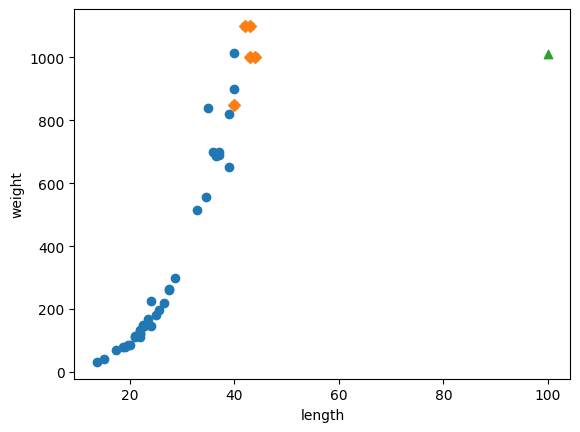

In [10]:
import matplotlib.pyplot as plt

# 50cm농어의 이웃을 구하기
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그리
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(100, 1010, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 위의 k-최근접 이웃 알고리즘을 선형회귀 알고리즘으로 변경

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)  # 선형회귀 알고리즘으로 모델 훈련

LinearRegression()

In [12]:
lr.predict([[50]])  # 50cm 농어에 대해 예측

array([1241.83860323])

In [13]:
print(lr.coef_)      # 계수(coefficient) == 기울기 == 가중치  cf) 모델 파라미터
print(lr.intercept_) # 독립변수가 모두 0일때 종속변수 y의 값,  모형에 상수항이 있는가 없는가를 결정하는 인수

[39.01714496]
-709.0186449535477


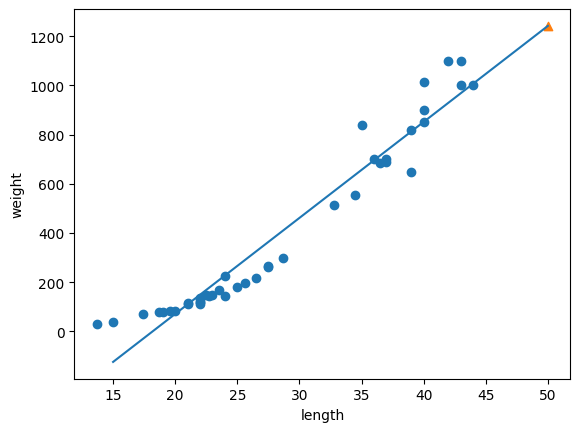

In [16]:
# 훈련 세트의 산점도 표시
plt.scatter(train_input, train_target)

# 농어의 길이 15에서 50까지의 1차 방정식 그래프의 직선을 그리기
plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])
plt.scatter(50,1241.83, marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()